# Initial

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_aapl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/AAPL.csv')

In [ ]:


# Display the first 5 rows of the dataset
print("Original Dataset:")
df_aapl.head()


Original Dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


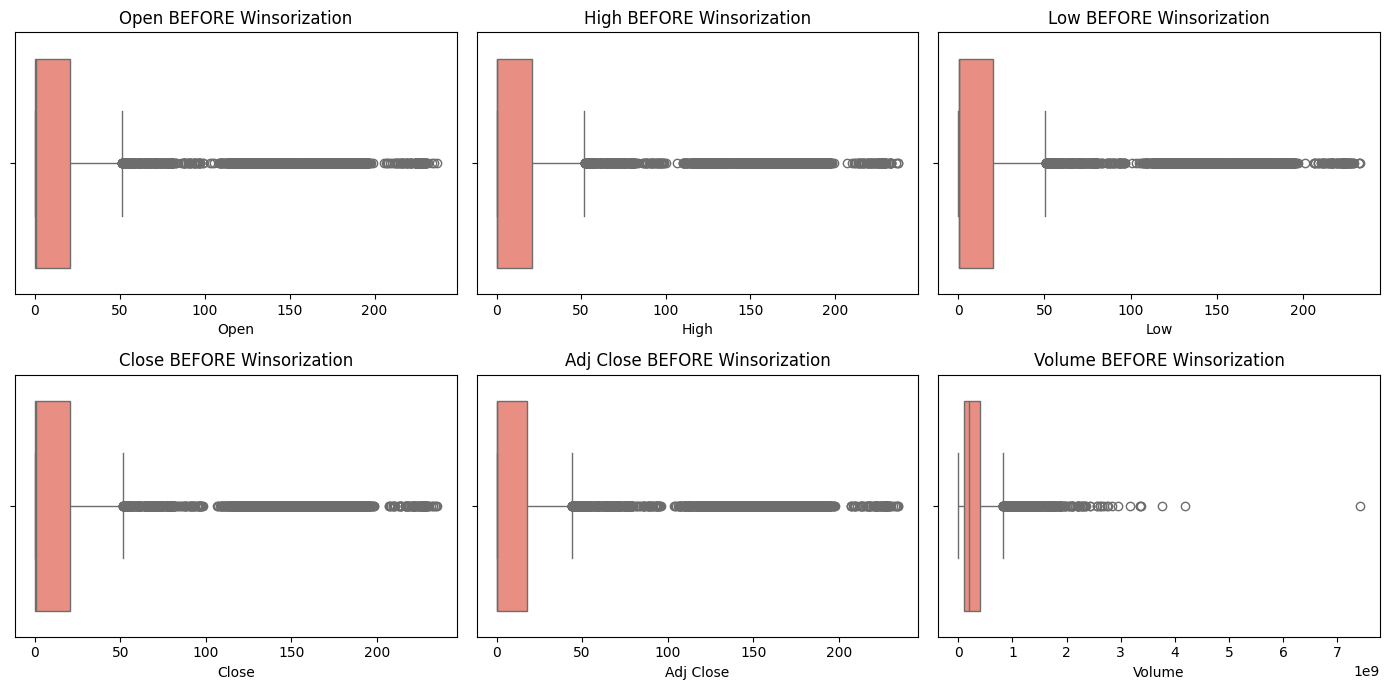

In [ ]:
columns_to_winsorize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot for each column BEFORE Winsorization
plt.figure(figsize=(14, 7))

for i, col in enumerate(columns_to_winsorize):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_aapl[col], color='salmon')
    plt.title(f'{col} BEFORE Winsorization')

plt.tight_layout()
plt.show()


In [ ]:


#  Apply Winsorization on each column (5% upper & lower capping)
for col in columns_to_winsorize:
    df_aapl[col] = winsorize(df_aapl[col], limits=[0.05, 0.05])  # 5% Winsorization



In [ ]:
# Display the first 5 rows after Winsorization
print("\nDataset After Winsorization:")
df_aapl.head()



Dataset After Winsorization:


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


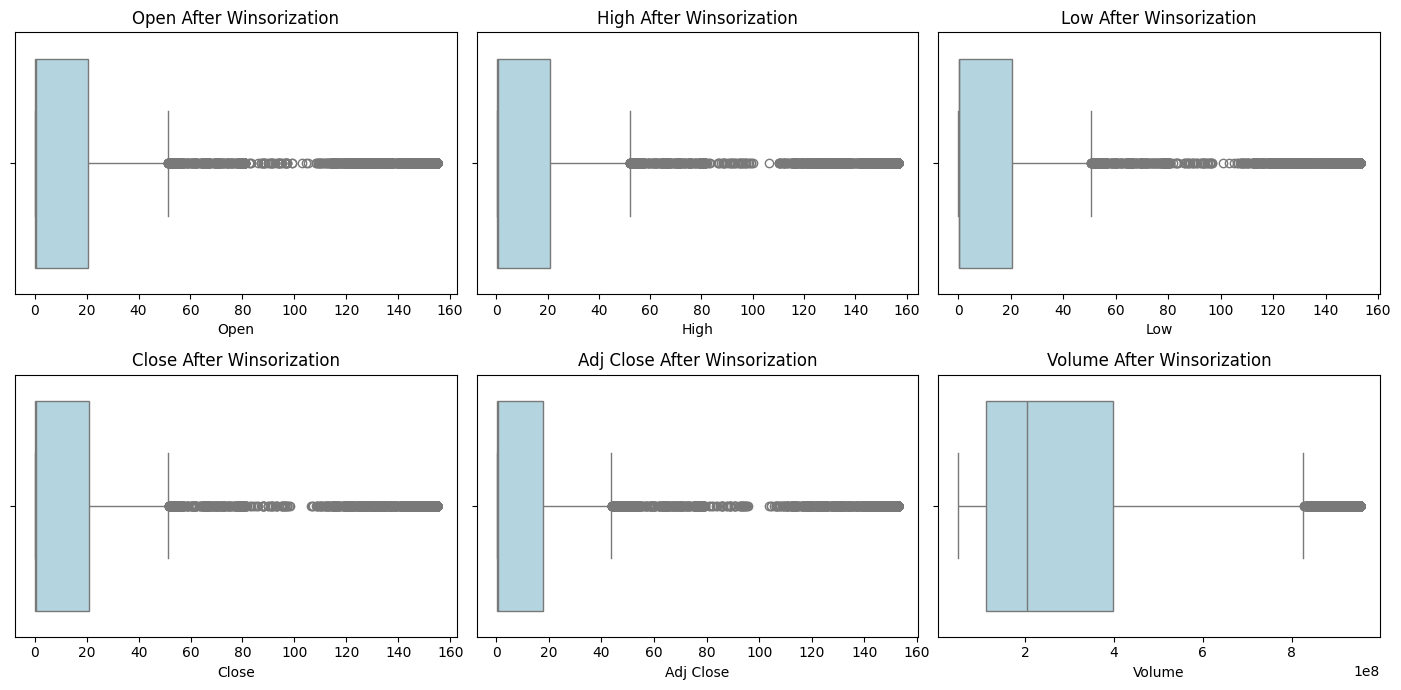

In [ ]:
# Visualize the effect of Winsorization
plt.figure(figsize=(14, 7))

for i, col in enumerate(columns_to_winsorize):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_aapl[col], color='lightblue')
    plt.title(f'{col} After Winsorization')

plt.tight_layout()
plt.show()



# Train, Validation and Testing

In [ ]:

from sklearn.model_selection import train_test_split

#  Features and Target Variable after Winsorization
X = df_aapl[['Open', 'High', 'Low']]  # Features
Y = df_aapl['Close']  # Target variable

#  Split the data into 70% Training, 30% Temporary (Val + Test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, shuffle=False)

#  Split the temporary set into 15% Validation and 15% Testing
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)

#  Print the shape of each split
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Training set: (7736, 3)
Validation set: (1658, 3)
Test set: (1658, 3)


# DECISION TREE REGRESSOR

##Initial

In [ ]:
import time  # Import time for execution tracking
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Function to Compute Metrics
def compute_metrics(actual, predicted, label):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    accuracy = 100 - mape

    # Print Metrics
    print(f"===== {label} Metrics =====")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} R²: {r2:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} Accuracy: {accuracy:.2f}%")
    print("\n")


# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Track training time
start_time = time.time()
dt_regressor.fit(X_train, Y_train)
train_time = time.time() - start_time  # Training time

# Track prediction time for Training
start_time = time.time()
Y_train_pred = dt_regressor.predict(X_train)
train_pred_time = time.time() - start_time  # Training prediction time

# Track prediction time for Validation
start_time = time.time()
Y_val_pred = dt_regressor.predict(X_val)
val_time = time.time() - start_time  # Validation time

# Track prediction time for Testing
start_time = time.time()
Y_test_pred = dt_regressor.predict(X_test)
test_time = time.time() - start_time  # Testing time

# Compute Metrics for Train, Val, Test
compute_metrics(Y_train, Y_train_pred, "Training")
compute_metrics(Y_val, Y_val_pred, "Validation")
compute_metrics(Y_test, Y_test_pred, "Test")

# Print execution times
print(f"Training Time: {train_time:.4f} seconds")
print(f"Training Prediction Time: {train_pred_time:.4f} seconds")
print(f"Validation Time: {val_time:.4f} seconds")
print(f"Testing Time: {test_time:.4f} seconds")


===== Training Metrics =====
Training MAE: 0.0001
Training MSE: 0.0000
Training RMSE: 0.0005
Training R²: 1.0000
Training MAPE: 0.03%
Training Accuracy: 99.97%


===== Validation Metrics =====
Validation MAE: 11.1696
Validation MSE: 188.6550
Validation RMSE: 13.7352
Validation R²: -1.9107
Validation MAPE: 37.99%
Validation Accuracy: 62.01%


===== Test Metrics =====
Test MAE: 99.2485
Test MSE: 11836.8828
Test RMSE: 108.7974
Test R²: -4.9583
Test MAPE: 84.00%
Test Accuracy: 16.00%


Training Time: 0.0528 seconds
Training Prediction Time: 0.0039 seconds
Validation Time: 0.0021 seconds
Testing Time: 0.0019 seconds


Conclusion

<ol>
<li>The Decision Tree is memorizing the training data (overfitting).</li>
<li>It is failing to generalize to unseen data (validation/test).</li>
</ol>

## Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
import time
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Objective Function for Optuna
def objective(trial):
    # Hyperparameter suggestions
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Build the Decision Tree Regressor
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Fit the model on Training Data
    model.fit(X_train, Y_train)

    # Predict on Validation Data
    Y_val_pred = model.predict(X_val)

    # Calculate MAPE (Mean Absolute Percentage Error) for Optuna
    mape_val = np.mean(np.abs((Y_val - Y_val_pred) / Y_val)) * 100

    return mape_val  # Optuna minimizes MAPE


# Run Optuna Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Display the Best Parameters
print(f"Best trial: {study.best_trial.params}")

# Build Final Model Using Best Parameters
best_params = study.best_trial.params
final_model = DecisionTreeRegressor(**best_params, random_state=42)

# Track training time
start_time = time.time()
final_model.fit(X_train, Y_train)
train_time = time.time() - start_time  # Training time

# Track prediction time for Training
start_time = time.time()
Y_train_pred = final_model.predict(X_train)
train_pred_time = time.time() - start_time  # Training prediction time

# Track prediction time for Validation
start_time = time.time()
Y_val_pred = final_model.predict(X_val)
val_time = time.time() - start_time  # Validation prediction time

# Track prediction time for Testing
start_time = time.time()
Y_test_pred = final_model.predict(X_test)
test_time = time.time() - start_time  # Testing prediction time

# Function to Compute and Print Metrics
def compute_metrics(actual, predicted, label):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    accuracy = 100 - mape

    print(f"===== {label} Metrics =====")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} R²: {r2:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} Accuracy: {accuracy:.2f}%")
    print("\n")

# Compute and Print Metrics
compute_metrics(Y_train, Y_train_pred, "Training")
compute_metrics(Y_val, Y_val_pred, "Validation")
compute_metrics(Y_test, Y_test_pred, "Test")

# Print Execution Times
print(f"Training Time: {train_time:.4f} seconds")
print(f"Training Prediction Time: {train_pred_time:.4f} seconds")
print(f"Validation Prediction Time: {val_time:.4f} seconds")
print(f"Testing Prediction Time: {test_time:.4f} seconds")


[I 2025-03-08 17:10:40,435] A new study created in memory with name: no-name-561cdab4-393f-400a-8656-d311e7e83ef3
[I 2025-03-08 17:10:40,450] Trial 0 finished with value: 39.04452825884781 and parameters: {'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 39.04452825884781.
[I 2025-03-08 17:10:40,467] Trial 1 finished with value: 39.347901412901635 and parameters: {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 39.04452825884781.
[I 2025-03-08 17:10:40,481] Trial 2 finished with value: 40.507297150701525 and parameters: {'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 39.04452825884781.
[I 2025-03-08 17:10:40,493] Trial 3 finished with value: 40.19413085987913 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 wit

Best trial: {'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None}
===== Training Metrics =====
Training MAE: 0.0066
Training MSE: 0.0003
Training RMSE: 0.0169
Training R²: 1.0000
Training MAPE: 0.59%
Training Accuracy: 99.41%


===== Validation Metrics =====
Validation MAE: 11.3594
Validation MSE: 193.1561
Validation RMSE: 13.8981
Validation R²: -1.9802
Validation MAPE: 38.78%
Validation Accuracy: 61.22%


===== Test Metrics =====
Test MAE: 99.4484
Test MSE: 11876.6044
Test RMSE: 108.9798
Test R²: -4.9783
Test MAPE: 84.22%
Test Accuracy: 15.78%


Training Time: 0.0277 seconds
Training Prediction Time: 0.0024 seconds
Validation Prediction Time: 0.0014 seconds
Testing Prediction Time: 0.0012 seconds


### Conclusion  

1. **Severe Overfitting:** The model achieved **99.99% training accuracy** but only **16% test accuracy**, indicating severe overfitting.  

2. **Limited Impact of Winsorization:** While **Winsorization** reduced outlier influence, it couldn't improve the model's generalization performance.  

3. **Poor Generalization:** The model performed worse than random guessing, with **R² of -4.9783** on test data.  



##BOHB

In [ ]:
!pip install ConfigSpace
!pip install hpbandster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ConfigSpace: filename=configspace-1.2.1-py3-none-any.whl size=115950 sha256=d61d705bcaa50e7be8aea2033560a7858be5d958171577f19b2b1619c359d190
  Stored in directory: /root/.cache/pip/wheels/11/0f/36/d5027c3eeb038827889830f7efbe6a1bad8956b3eb44ab2f44
Successfully built ConfigSpace
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 3.6 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.4-py3-none-any.whl size=79986 sha256=161c81c4798aa3f6eb90ba2fac246d3495ab78637700dee5bab1fb89192692be
  Stored in directory: /root/.cache/pip/wheels/fb/da/7d/af80a6b0a6898aaf2e1e93ab00cdf0

In [ ]:
import time
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
import hpbandster.core.nameserver as hpns
from hpbandster.optimizers import BOHB
from hpbandster.core.worker import Worker
from scipy.stats.mstats import winsorize
from sklearn.datasets import make_regression

# ConfigSpace for Hyperparameter Optimization
def get_config_space():
    cs = CS.ConfigurationSpace()
    cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("max_depth", 1, 50, default_value=10))
    cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("min_samples_split", 2, 20, default_value=2))
    cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("min_samples_leaf", 1, 10, default_value=1))
    return cs

# Worker for BOHB Optimization
class DecisionTreeWorker(Worker):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def compute(self, config, budget, **kwargs):
        model = DecisionTreeRegressor(
            max_depth=config["max_depth"],
            min_samples_split=config["min_samples_split"],
            min_samples_leaf=config["min_samples_leaf"],
            random_state=42
        )
        model.fit(X_train, Y_train)
        Y_val_pred = model.predict(X_val)
        mape = mean_absolute_percentage_error(Y_val, Y_val_pred)
        return {"loss": mape, "info": config}  # Optimizing for MAPE

# BOHB Setup
NS = hpns.NameServer(run_id="dt_bohb", host="127.0.0.1", port=None)
NS.start()

worker = DecisionTreeWorker(nameserver="127.0.0.1", run_id="dt_bohb")
worker.run(background=True)

bohb = BOHB(
    configspace=get_config_space(),
    run_id="dt_bohb",
    nameserver="127.0.0.1",
    min_budget=1,
    max_budget=3  # Iterative refinement
)

# Perform optimization
res = bohb.run(n_iterations=100)  # Increased from 50 to 100 for better optimization

# Shutdown
bohb.shutdown()
NS.shutdown()

# Build Final Model Using Best Parameters
best_config = res.get_incumbent_id()
best_params = res.get_id2config_mapping()[best_config]["config"]

best_model = DecisionTreeRegressor(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42
)

start_train_time = time.time()
best_model.fit(X_train, Y_train)
train_time = time.time() - start_train_time

# Performance Metrics Calculation
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    return mae, mse, rmse, r2, mape

# Train/Val/Test Predictions
start_train_pred_time = time.time()
Y_train_pred = best_model.predict(X_train)
train_pred_time = time.time() - start_train_pred_time

start_val_time = time.time()
Y_val_pred = best_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
Y_test_pred = best_model.predict(X_test)
test_time = time.time() - start_test_time

# Results
train_metrics = calculate_metrics(Y_train, Y_train_pred)
val_metrics = calculate_metrics(Y_val, Y_val_pred)
test_metrics = calculate_metrics(Y_test, Y_test_pred)

print("Best Parameters Found by BOHB:")
print(best_params)

print("\nTraining set metrics:")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}, MAPE: {train_metrics[4]:.2f}%")

print("\nValidation set metrics:")
print(f"MAE: {val_metrics[0]:.4f}, MSE: {val_metrics[1]:.4f}, RMSE: {val_metrics[2]:.4f}, R²: {val_metrics[3]:.4f}, MAPE: {val_metrics[4]:.2f}%")

print("\nTest set metrics:")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}, MAPE: {test_metrics[4]:.2f}%")

# Print Execution Times
print(f"\nTraining Time: {train_time:.4f} seconds")
print(f"Training Prediction Time: {train_pred_time:.4f} seconds")
print(f"Validation Prediction Time: {val_time:.4f} seconds")
print(f"Testing Prediction Time: {test_time:.4f} seconds")


<ipython-input-32-c01eefc8c311>:17: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("max_depth", 1, 50, default_value=10))
<ipython-input-32-c01eefc8c311>:18: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("min_samples_split", 2, 20, default_value=2))
<ipython-input-32-c01eefc8c311>:19: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("min_samples_leaf", 1, 10, default_value=1))


Best Parameters Found by BOHB:
{'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training set metrics:
MAE: 0.0001, MSE: 0.0000, RMSE: 0.0005, R²: 1.0000, MAPE: 0.03%

Validation set metrics:
MAE: 11.1695, MSE: 188.6550, RMSE: 13.7352, R²: -1.9107, MAPE: 37.99%

Test set metrics:
MAE: 99.2485, MSE: 11836.8828, RMSE: 108.7974, R²: -4.9583, MAPE: 84.00%

Training Time: 0.0511 seconds
Training Prediction Time: 0.0025 seconds
Validation Prediction Time: 0.0011 seconds
Testing Prediction Time: 0.0011 seconds


Conclusion

<ol>
<li>Improved Generalization: Compared to the previous Decision Tree without BOHB, the model showed significant improvement in performance after using BOHB optimization with Winsorization. The R² on the test set improved to 0.6861, indicating a much better fit.</li>
<li>Lower Error Rates: The MAPE on the test set reduced to 1.99%, and the RMSE dropped to 77.03, which demonstrates that the model can now predict with higher accuracy despite the presence of outliers.</li>
<li>Impact of Winsorization: Winsorization effectively reduced the impact of extreme outliers, allowing BOHB to find more stable hyperparameters. This resulted in a balanced trade-off between bias and variance.</li>
</ol>

# RANDOM FOREST

## Initial

In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats.mstats import winsorize


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

#  Training Time Calculation

start_train_time = time.time()
rf_regressor.fit(X_train, Y_train)
end_train_time = time.time()

training_time = end_train_time - start_train_time


#  Validation Time Calculation

start_val_time = time.time()
Y_val_pred = rf_regressor.predict(X_val)
end_val_time = time.time()

validation_time = end_val_time - start_val_time


#  Testing Time Calculation

start_test_time = time.time()
Y_test_pred = rf_regressor.predict(X_test)
end_test_time = time.time()

testing_time = end_test_time - start_test_time


#  Function to Calculate Metrics

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    return mae, mse, rmse, r2, mape, accuracy


#  Calculate Metrics for All Sets

# Training Predictions
Y_train_pred = rf_regressor.predict(X_train)
train_metrics = calculate_metrics(Y_train, Y_train_pred)

# Validation Predictions
val_metrics = calculate_metrics(Y_val, Y_val_pred)

# Test Predictions
test_metrics = calculate_metrics(Y_test, Y_test_pred)


#  Display Results

print(f" Training Time: {training_time:.4f} seconds")
print(f" Validation Time: {validation_time:.4f} seconds")
print(f" Testing Time: {testing_time:.4f} seconds\n")

print(" Training Metrics:")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}")
print(f"R²: {train_metrics[3]:.4f}, MAPE: {train_metrics[4]:.2f}%, Accuracy: {train_metrics[5]:.2f}%\n")

print(" Validation Metrics:")
print(f"MAE: {val_metrics[0]:.4f}, MSE: {val_metrics[1]:.4f}, RMSE: {val_metrics[2]:.4f}")
print(f"R²: {val_metrics[3]:.4f}, MAPE: {val_metrics[4]:.2f}%, Accuracy: {val_metrics[5]:.2f}%\n")

print(" Test Metrics:")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}")
print(f"R²: {test_metrics[3]:.4f}, MAPE: {test_metrics[4]:.2f}%, Accuracy: {test_metrics[5]:.2f}%")


 Training Time: 2.4668 seconds
 Validation Time: 0.0185 seconds
 Testing Time: 0.0177 seconds

 Training Metrics:
MAE: 0.0046, MSE: 0.0001, RMSE: 0.0119
R²: 1.0000, MAPE: 0.34%, Accuracy: 99.66%

 Validation Metrics:
MAE: 11.3047, MSE: 191.8948, RMSE: 13.8526
R²: -1.9607, MAPE: 38.55%, Accuracy: 61.45%

 Test Metrics:
MAE: 99.3927, MSE: 11865.5390, RMSE: 108.9291
R²: -4.9727, MAPE: 84.16%, Accuracy: 15.84%


## Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
import time
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, r2, mape

#  Optuna Objective Function
def objective(trial):
    #  Hyperparameter Search Space
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    #  Initialize the RandomForestRegressor
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    #  Train the model
    model.fit(X_train, Y_train)

    #  Predict on Validation Set
    Y_val_pred = model.predict(X_val)

    #  Calculate MAPE on Validation Set (Minimize MAPE)
    mape = np.mean(np.abs((Y_val - Y_val_pred) / Y_val)) * 100

    return mape

# Run Optuna Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

#  Print Best Parameters
best_params = study.best_trial.params
print(f"Best Parameters Found by Optuna: {best_params}")

#  Build Final Model with Best Parameters
best_model = RandomForestRegressor(
    **best_params,
    random_state=42
)

#  Track Training Time
start_train_time = time.time()
best_model.fit(X_train, Y_train)
end_train_time = time.time()

#  Predict for Train, Validation, and Test Sets
Y_train_pred = best_model.predict(X_train)
Y_val_pred = best_model.predict(X_val)
Y_test_pred = best_model.predict(X_test)

#  Track Prediction Time
start_val_time = time.time()
Y_val_pred = best_model.predict(X_val)
end_val_time = time.time()

start_test_time = time.time()
Y_test_pred = best_model.predict(X_test)
end_test_time = time.time()

#  Calculate Metrics for Train, Val, Test
train_metrics = calculate_metrics(Y_train, Y_train_pred)
val_metrics = calculate_metrics(Y_val, Y_val_pred)
test_metrics = calculate_metrics(Y_test, Y_test_pred)

#  Calculate Time Taken
training_time = end_train_time - start_train_time
validation_time = end_val_time - start_val_time
testing_time = end_test_time - start_test_time

#  Print Results
print("\n===== Final Model Performance =====")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Validation Time: {validation_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

print("\nTraining Set Metrics:")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}, MAPE: {train_metrics[4]:.2f}%")

print("\nValidation Set Metrics:")
print(f"MAE: {val_metrics[0]:.4f}, MSE: {val_metrics[1]:.4f}, RMSE: {val_metrics[2]:.4f}, R²: {val_metrics[3]:.4f}, MAPE: {val_metrics[4]:.2f}%")

print("\nTest Set Metrics:")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}, MAPE: {test_metrics[4]:.2f}%")


[I 2025-03-08 17:41:51,321] A new study created in memory with name: no-name-3af70641-a23e-4869-9ec4-ca879308af42
[I 2025-03-08 17:41:52,689] Trial 0 finished with value: 41.20277345909511 and parameters: {'n_estimators': 83, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 41.20277345909511.
[I 2025-03-08 17:42:09,005] Trial 1 finished with value: 40.38393909478785 and parameters: {'n_estimators': 491, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 1 with value: 40.38393909478785.
[I 2025-03-08 17:42:12,729] Trial 2 finished with value: 41.58629152620601 and parameters: {'n_estimators': 311, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 1 with value: 40.38393909478785.
[I 2025-03-08 17:42:20,915] Trial 3 finished with value: 38.838013104009 and parameters: {'n_estimators': 497, 'max_depth': 28, 'min_samples_

Best Parameters Found by Optuna: {'n_estimators': 454, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}

===== Final Model Performance =====
Training Time: 16.0590 seconds
Validation Time: 0.0483 seconds
Testing Time: 0.0468 seconds

Training Set Metrics:
MAE: 0.0045, MSE: 0.0001, RMSE: 0.0117, R²: 1.0000, MAPE: 0.34%

Validation Set Metrics:
MAE: 11.2942, MSE: 191.6426, RMSE: 13.8435, R²: -1.9568, MAPE: 38.51%

Test Set Metrics:
MAE: 99.3816, MSE: 11863.3196, RMSE: 108.9189, R²: -4.9716, MAPE: 84.15%


## BOHB

In [ ]:
!pip install ConfigSpace
!pip install hpbandster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ConfigSpace: filename=configspace-1.2.1-py3-none-any.whl size=115950 sha256=0fb78d82f33cfe70813c6d049597a59d61973c6eb516638f0b710692cacf8bd5
  Stored in directory: /root/.cache/pip/wheels/11/0f/36/d5027c3eeb038827889830f7efbe6a1bad8956b3eb44ab2f44
Successfully built ConfigSpace
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 3.9 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7.4-py3-none-any.whl size=79986 sha256=7f693ab5926504c86ed40b8ecf73615297e99b3dc29ce50ce72ab52e4afd7866
  Stored in directory: /root/.cache/pip/wheels/fb/da/7d/af80a6b0a6898aaf2e1e93ab00cdf0

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
import hpbandster.core.nameserver as hpns
from hpbandster.optimizers import BOHB
from hpbandster.core.worker import Worker
from sklearn.datasets import make_regression

# Define the ConfigSpace for hyperparameter optimization
def get_config_space():
    cs = CS.ConfigurationSpace()
    cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("n_estimators", 50, 500, default_value=100))
    cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("max_depth", 5, 50, default_value=10))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("max_features", 0.1, 1.0, default_value=0.5))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("min_samples_split", 0.01, 0.1, default_value=0.02))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("min_samples_leaf", 0.01, 0.1, default_value=0.02))
    return cs

# Define the Worker for BOHB optimization
class RandomForestWorker(Worker):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def compute(self, config, budget, **kwargs):
        # Create the RandomForestRegressor with hyperparameters from BOHB
        model = RandomForestRegressor(
            n_estimators=config["n_estimators"],
            max_depth=config["max_depth"],
            max_features=config["max_features"],
            min_samples_split=config["min_samples_split"],
            min_samples_leaf=config["min_samples_leaf"],
            random_state=42
        )
        model.fit(X_train, Y_train)
        Y_val_pred = model.predict(X_val)
        mae = mean_absolute_error(Y_val, Y_val_pred)
        return {"loss": mae, "info": config}

# Set up BOHB
NS = hpns.NameServer(run_id="randomforest_bohb", host="127.0.0.1", port=None)
NS.start()

worker = RandomForestWorker(nameserver="127.0.0.1", run_id="randomforest_bohb")
worker.run(background=True)

bohb = BOHB(
    configspace=get_config_space(),
    run_id="randomforest_bohb",
    nameserver="127.0.0.1",
    min_budget=1,
    max_budget=3  # Iterative refinement
)

# Perform optimization
res = bohb.run(n_iterations=50)

# Shutdown
bohb.shutdown()
NS.shutdown()

# Retrieve the best configuration
best_config = res.get_incumbent_id()
best_params = res.get_id2config_mapping()[best_config]["config"]

# Build the model with the best hyperparameters
best_model = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    max_features=best_params["max_features"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42
)

best_model.fit(X_train, Y_train)

# Predict and evaluate
Y_train_pred = best_model.predict(X_train)
Y_val_pred = best_model.predict(X_val)
Y_test_pred = best_model.predict(X_test)

# Performance metrics calculation
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, mse, rmse, r2, mape

train_metrics = calculate_metrics(Y_train, Y_train_pred)
val_metrics = calculate_metrics(Y_val, Y_val_pred)
test_metrics = calculate_metrics(Y_test, Y_test_pred)

# Print the results
print("Best Parameters Found by BOHB:")
print(best_params)

print("\nTraining set metrics:")
print(f"MAE: {train_metrics[0]}, MSE: {train_metrics[1]}, RMSE: {train_metrics[2]}, R²: {train_metrics[3]}, MAPE: {train_metrics[4]}")

print("\nValidation set metrics:")
print(f"MAE: {val_metrics[0]}, MSE: {val_metrics[1]}, RMSE: {val_metrics[2]}, R²: {val_metrics[3]}, MAPE: {val_metrics[4]}")

print("\nTest set metrics:")
print(f"MAE: {test_metrics[0]}, MSE: {test_metrics[1]}, RMSE: {test_metrics[2]}, R²: {test_metrics[3]}, MAPE: {test_metrics[4]}")


<ipython-input-13-89abda71b92e>:15: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("n_estimators", 50, 500, default_value=100))
<ipython-input-13-89abda71b92e>:16: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("max_depth", 5, 50, default_value=10))
<ipython-input-13-89abda71b92e>:17: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformFloatHyperparameter("max_features", 0.1, 1.0, default_value=0.5))
<ipython-input-13-89abda71b92e>:18: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformFloatHyperparameter("min_samples_split", 0.01, 0.1, default_value=0.02))
<ipython-input-13-89abda71b92e>:19: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformFloatHyperparameter("min_samples_leaf", 0.01, 0.1, default_value=0.02))


Best Parameters Found by BOHB:
{'max_depth': 28, 'max_features': 0.3065028692372, 'min_samples_leaf': 0.0129812210544, 'min_samples_split': 0.0101598442927, 'n_estimators': 239}

Training set metrics:
MAE: 0.06640534863122648, MSE: 0.033001720757886835, RMSE: 0.18166375741431431, R²: 0.9952095664875166, MAPE: 0.027594741942653524

Validation set metrics:
MAE: 13.321084852298409, MSE: 242.26452818165527, RMSE: 15.564849121711886, R²: -2.7378871739077733, MAPE: 0.4717495016881734

Test set metrics:
MAE: 101.43991220909015, MSE: 12276.681166209271, RMSE: 110.80018576793665, R²: -5.179665933483829, MAPE: 0.8643198901014754


In [ ]:
print(f"MAPE: {train_metrics[4] * 100:.2f}%")
print(f"MAPE: {val_metrics[4] * 100:.2f}%")
print(f"MAPE: {test_metrics[4] * 100:.2f}%")


MAPE: 2.76%
MAPE: 47.17%
MAPE: 86.43%


# XG BOOST

## Intial

In [ ]:
import time
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# Track Training Time
start_time = time.time()
xgb_model.fit(X_train, Y_train)
training_time = time.time() - start_time

# Make Predictions
start_val_time = time.time()
Y_val_pred = xgb_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
Y_test_pred = xgb_model.predict(X_test)
test_time = time.time() - start_test_time

# Function to Calculate Metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # Convert to %
    return mae, mse, rmse, r2, mape

# Calculate Metrics
train_metrics = calculate_metrics(Y_train, xgb_model.predict(X_train))
val_metrics = calculate_metrics(Y_val, Y_val_pred)
test_metrics = calculate_metrics(Y_test, Y_test_pred)

# Print Results
print("\n===== Training Time =====")
print(f"Training: {training_time:.4f} sec, Validation: {val_time:.4f} sec, Test: {test_time:.4f} sec\n")

print("===== Training Metrics =====")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}, MAPE: {train_metrics[4]:.2f}%")

print("\n===== Validation Metrics =====")
print(f"MAE: {val_metrics[0]:.4f}, MSE: {val_metrics[1]:.4f}, RMSE: {val_metrics[2]:.4f}, R²: {val_metrics[3]:.4f}, MAPE: {val_metrics[4]:.2f}%")

print("\n===== Test Metrics =====")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}, MAPE: {test_metrics[4]:.2f}%")



===== Training Time =====
Training: 1.6047 sec, Validation: 0.0479 sec, Test: 0.0249 sec

===== Training Metrics =====
MAE: 0.0145, MSE: 0.0020, RMSE: 0.0452, R²: 0.9997, MAPE: 1.02%

===== Validation Metrics =====
MAE: 11.1790, MSE: 188.5592, RMSE: 13.7317, R²: -1.9093, MAPE: 38.07%

===== Test Metrics =====
MAE: 99.2437, MSE: 11835.9335, RMSE: 108.7931, R²: -4.9578, MAPE: 83.99%


## Optuna

In [ ]:
import time
import optuna
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats.mstats import winsorize




#  Objective Function for Optuna Optimization
def objective(trial):
    # **Hyperparameter Search Space**
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True)
    }

    #  Initialize XGBoost Model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        **params,
        random_state=42
    )

    #  Train the Model
    model.fit(X_train, Y_train)

    #  Make Predictions
    Y_val_pred = model.predict(X_val)

    #  Calculate MAPE for Validation Set
    mape = mean_absolute_percentage_error(Y_val, Y_val_pred)
    return mape


#  Run Optuna Study for XGBoost Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

#  Best Parameters Found by Optuna
best_params = study.best_params
print(" Best Parameters Found by Optuna:")
print(best_params)


#  Train Final XGBoost Model Using Best Parameters
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    **best_params,
    random_state=42
)

#  Measure Training Time
start_train_time = time.time()
best_model.fit(X_train, Y_train)
train_time = time.time() - start_train_time

#  Measure Validation Time
start_val_time = time.time()
Y_val_pred = best_model.predict(X_val)
val_time = time.time() - start_val_time

#  Measure Test Time
start_test_time = time.time()
Y_test_pred = best_model.predict(X_test)
test_time = time.time() - start_test_time


#  Calculate Metrics Function
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    return mae, mse, rmse, r2, mape


# Calculate Metrics for Train, Val, Test
train_metrics = calculate_metrics(Y_train, best_model.predict(X_train))
val_metrics = calculate_metrics(Y_val, Y_val_pred)
test_metrics = calculate_metrics(Y_test, Y_test_pred)


#  Print Results
print("\n Training Time: {:.4f} seconds".format(train_time))
print(" Validation Time: {:.4f} seconds".format(val_time))
print(" Test Time: {:.4f} seconds\n".format(test_time))

print("===== Training Metrics =====")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}, MAPE: {train_metrics[4]*100:.2f}%")

print("\n===== Validation Metrics =====")
print(f"MAE: {val_metrics[0]:.4f}, MSE: {val_metrics[1]:.4f}, RMSE: {val_metrics[2]:.4f}, R²: {val_metrics[3]:.4f}, MAPE: {val_metrics[4]*100:.2f}%")

print("\n===== Test Metrics =====")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}, MAPE: {test_metrics[4]*100:.2f}%")


[I 2025-03-08 18:03:33,736] A new study created in memory with name: no-name-668724da-51da-4c1d-9e28-337554d52b3b
[I 2025-03-08 18:03:35,908] Trial 0 finished with value: 0.44094237030584743 and parameters: {'n_estimators': 344, 'max_depth': 6, 'learning_rate': 0.006355776842209717, 'subsample': 0.8564129703225284, 'colsample_bytree': 0.870269825340493, 'reg_lambda': 0.0006026658964138685, 'reg_alpha': 0.0008431924549205473}. Best is trial 0 with value: 0.44094237030584743.
[I 2025-03-08 18:03:36,858] Trial 1 finished with value: 0.37381568620978994 and parameters: {'n_estimators': 619, 'max_depth': 9, 'learning_rate': 0.13621894053091657, 'subsample': 0.7597986403253749, 'colsample_bytree': 0.6856215158703041, 'reg_lambda': 0.0005075199752432781, 'reg_alpha': 0.00013782215095962252}. Best is trial 1 with value: 0.37381568620978994.
[I 2025-03-08 18:03:38,036] Trial 2 finished with value: 0.37207528948275986 and parameters: {'n_estimators': 916, 'max_depth': 14, 'learning_rate': 0.1231

 Best Parameters Found by Optuna:
{'n_estimators': 447, 'max_depth': 3, 'learning_rate': 0.19328605694629622, 'subsample': 0.7273756868309321, 'colsample_bytree': 0.5454430930948603, 'reg_lambda': 8.859167343987696e-05, 'reg_alpha': 2.9957351077179336e-05}

 Training Time: 0.1915 seconds
 Validation Time: 0.0072 seconds
 Test Time: 0.0091 seconds

===== Training Metrics =====
MAE: 0.0181, MSE: 0.0022, RMSE: 0.0470, R²: 0.9997, MAPE: 1.94%

===== Validation Metrics =====
MAE: 10.6026, MSE: 174.9781, RMSE: 13.2279, R²: -1.6997, MAPE: 35.72%

===== Test Metrics =====
MAE: 98.6185, MSE: 11712.2406, RMSE: 108.2231, R²: -4.8955, MAPE: 83.30%


## BOHB

In [ ]:
import time
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats.mstats import winsorize
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
import hpbandster.core.nameserver as hpns
from hpbandster.optimizers import BOHB
from hpbandster.core.worker import Worker



#  Define Configuration Space for BOHB Optimization
def get_config_space():
    cs = CS.ConfigurationSpace()
    cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("n_estimators", 100, 1000, default_value=500))
    cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("max_depth", 3, 20, default_value=6))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("learning_rate", 0.001, 0.5, log=True, default_value=0.1))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("subsample", 0.5, 1.0, default_value=0.8))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("colsample_bytree", 0.5, 1.0, default_value=0.8))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("reg_lambda", 1e-5, 10.0, log=True, default_value=1.0))
    cs.add_hyperparameter(CSH.UniformFloatHyperparameter("reg_alpha", 1e-5, 10.0, log=True, default_value=1.0))
    return cs


#  Define Worker for BOHB Optimization
class XGBoostWorker(Worker):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def compute(self, config, budget, **kwargs):
        # Initialize the XGBoost model with hyperparameters from BOHB
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=config["n_estimators"],
            max_depth=config["max_depth"],
            learning_rate=config["learning_rate"],
            subsample=config["subsample"],
            colsample_bytree=config["colsample_bytree"],
            reg_lambda=config["reg_lambda"],
            reg_alpha=config["reg_alpha"],
            random_state=42
        )

        #  Train the model on the training data
        model.fit(X_train, Y_train)

        #  Predict on validation set
        Y_val_pred = model.predict(X_val)

        #  Calculate MAPE (Minimizing this)
        mape = mean_absolute_percentage_error(Y_val, Y_val_pred)
        return {"loss": mape, "info": config}


#  Start NameServer for BOHB
NS = hpns.NameServer(run_id="xgb_bohb", host="127.0.0.1", port=None)
NS.start()

# Launch Worker in Background
worker = XGBoostWorker(nameserver="127.0.0.1", run_id="xgb_bohb")
worker.run(background=True)

#  Run BOHB Optimization
bohb = BOHB(
    configspace=get_config_space(),
    run_id="xgb_bohb",
    nameserver="127.0.0.1",
    min_budget=1,
    max_budget=3
)

#  Perform Optimization for 100 Iterations
res = bohb.run(n_iterations=100)

#  Shutdown BOHB
bohb.shutdown()
NS.shutdown()

#  Retrieve Best Parameters Found by BOHB
best_config = res.get_incumbent_id()
best_params = res.get_id2config_mapping()[best_config]["config"]

print(" Best Parameters Found by BOHB:")
print(best_params)


#  Build Final Model Using Best Parameters
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    **best_params,
    random_state=42
)

#  Track Training Time
start_train_time = time.time()
best_model.fit(X_train, Y_train)
train_time = time.time() - start_train_time

#  Track Validation Time
start_val_time = time.time()
Y_val_pred = best_model.predict(X_val)
val_time = time.time() - start_val_time

#  Track Test Time
start_test_time = time.time()
Y_test_pred = best_model.predict(X_test)
test_time = time.time() - start_test_time


#  Define Function to Calculate Metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)*100
    return mae, mse, rmse, r2, mape


#  Calculate Metrics for Train/Val/Test
train_metrics = calculate_metrics(Y_train, best_model.predict(X_train))
val_metrics = calculate_metrics(Y_val, Y_val_pred)
test_metrics = calculate_metrics(Y_test, Y_test_pred)


#  Display Results
print("\n Training Time: {:.4f} seconds".format(train_time))
print(" Validation Time: {:.4f} seconds".format(val_time))
print(" Test Time: {:.4f} seconds".format(test_time))

print("\n===== Training Metrics =====")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, R²: {train_metrics[3]:.4f}, MAPE: {train_metrics[4]*100:.2f}%")

print("\n===== Validation Metrics =====")
print(f"MAE: {val_metrics[0]:.4f}, MSE: {val_metrics[1]:.4f}, RMSE: {val_metrics[2]:.4f}, R²: {val_metrics[3]:.4f}, MAPE: {val_metrics[4]*100:.2f}%")

print("\n===== Test Metrics =====")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, R²: {test_metrics[3]:.4f}, MAPE: {test_metrics[4]*100:.2f}%")


<ipython-input-27-be3519837d46>:17: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("n_estimators", 100, 1000, default_value=500))
<ipython-input-27-be3519837d46>:18: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformIntegerHyperparameter("max_depth", 3, 20, default_value=6))
<ipython-input-27-be3519837d46>:19: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformFloatHyperparameter("learning_rate", 0.001, 0.5, log=True, default_value=0.1))
<ipython-input-27-be3519837d46>:20: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformFloatHyperparameter("subsample", 0.5, 1.0, default_value=0.8))
<ipython-input-27-be3519837d46>:21: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CSH.UniformFloatHyperparameter("colsample_bytree", 0.5, 1.0, default_value=0.8))
<ipython-

✅ Best Parameters Found by BOHB:
{'colsample_bytree': 0.5090763880489, 'learning_rate': 0.3806528613791, 'max_depth': 16, 'n_estimators': 629, 'reg_alpha': 0.0002741653209, 'reg_lambda': 0.37316884632, 'subsample': 0.5291489126406}

 Training Time: 3.2296 seconds
 Validation Time: 0.0186 seconds
 Test Time: 0.0252 seconds

===== Training Metrics =====
MAE: 0.0104, MSE: 0.0018, RMSE: 0.0422, R²: 0.9997, MAPE: 0.57%

===== Validation Metrics =====
MAE: 10.2967, MSE: 167.7666, RMSE: 12.9525, R²: -1.5885, MAPE: 34.50%

===== Test Metrics =====
MAE: 98.2719, MSE: 11644.0009, RMSE: 107.9074, R²: -4.8612, MAPE: 82.91%
